In [1]:
# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
!pip install tensorflow

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2024-01-30 07:45:22.086674: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 07:45:22.152744: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 07:45:22.152818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 07:45:22.154328: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 07:45:22.163563: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 07:45:22.164727: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
print(f'version of Tensorflow :{tf.__version__}')
print(f'version of keras :{tf.keras.__version__}')

version of Tensorflow :2.15.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [4]:
# Q2. Load the Wine Quality dataset and explore its dimensions.

df=pd.read_csv('wine.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [6]:
# Q3. Check for null values, identify categorical variables, and encode them.

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [10]:
df.quality.unique()

array(['bad', 'good'], dtype=object)

In [11]:
df.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [12]:
# converting catagorical to numarical
df.quality=le.fit_transform(df.quality)

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [14]:
df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [15]:
df.duplicated().sum()

240

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
# Q4. Separate the features and target variables from the dataset.

In [19]:
x=df.drop('quality',axis=1)
y=df.quality

In [20]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [21]:
y.head()

0    0
1    0
2    0
3    1
5    0
Name: quality, dtype: int64

In [22]:
# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=42)

In [24]:
x_train.shape,y_train.shape

((1005, 11), (1005,))

In [25]:
x_test.shape,y_test.shape

((354, 11), (354,))

In [26]:
# Q6. Scale the dataset using an appropriate scaling technique.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [28]:
# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical
# # variables.

In [29]:
LAYERS = [tf.keras.layers.Input(shape=(x_train_sc.shape[1],)),
          tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="sigmoid", name="outputLayer")]




# Q8. Create a Sequential model in Keras and add the previously designed layers to it.
model_clf = tf.keras.models.Sequential(LAYERS)

In [30]:
model_clf.layers

In [31]:
# Q9. Print the summary of the model architecture.
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenLayer1 (Dense)        (None, 200)               2400      
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               20100     
                                                                 
 outputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 22601 (88.29 KB)
Trainable params: 22601 (88.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
hidden=model_clf.layers[2]

In [33]:
weights,bias=hidden.get_weights()

In [34]:
len(weights)

100

In [35]:
len(bias)

1

In [36]:
# Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [37]:
loss_fun='binary_crossentropy'
optimizer=tf.keras.optimizers.Adam(learning_rate=0.002)
metrics=['accuracy']


# Q11. Compile the model with the specified loss function, optimizer, and metrics.

model_clf.compile(optimizer=optimizer,loss=loss_fun,metrics=metrics)

In [38]:
# Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [39]:
v_history=model_clf.fit(x_train_sc,y_train,epochs=30,batch_size=32,validation_data=(x_test_sc,y_test))

Epoch 1/30
32/32 [==============================] - 1s 10ms/step - loss: 0.5669 - accuracy: 0.7095 - val_loss: 0.4925 - val_accuracy: 0.7514
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.7512 - val_loss: 0.4861 - val_accuracy: 0.7542
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 0.4914 - accuracy: 0.7473 - val_loss: 0.4885 - val_accuracy: 0.7712
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 0.4805 - accuracy: 0.7692 - val_loss: 0.4926 - val_accuracy: 0.7684
Epoch 5/30
32/32 [==============================] - 0s 4ms/step - loss: 0.4703 - accuracy: 0.7692 - val_loss: 0.5108 - val_accuracy: 0.7486
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7662 - val_loss: 0.5009 - val_accuracy: 0.7655
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.7960 - val_loss: 0.5004 - val_accuracy: 0.7797
Epoch 8/30
32/32 [=

In [40]:
model_history=model_clf.fit(x_train_sc,y_train,epochs=30,batch_size=32)

Epoch 1/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.8935
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.8965
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9075
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9065
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9134
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.9164
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9075
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9095
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9234
Epoch 10/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9264
Epoch 11/30
32/32 [

<AxesSubplot: >

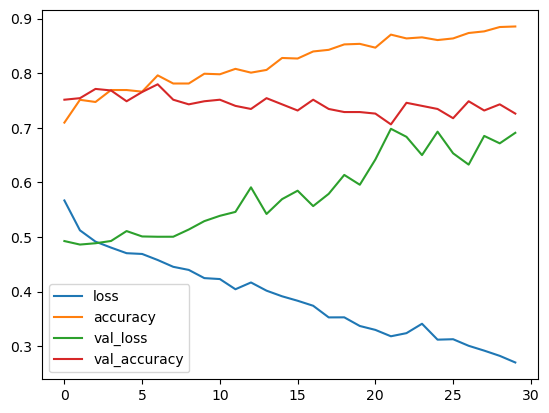

In [41]:
pd.DataFrame(v_history.history).plot()

<AxesSubplot: >

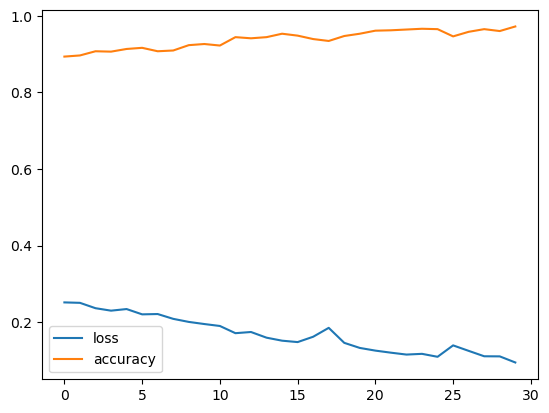

In [42]:
pd.DataFrame(model_history.history).plot()

In [43]:
# Q13. Obtain the model's parameters (weights and biases).

In [44]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 32}

In [45]:
hidden=model_clf.layers[1]

In [46]:
weight,bias=hidden.get_weights()

In [47]:
weight.shape,bias.shape

((200, 100), (100,))

In [48]:
bias

array([ 0.04409812,  0.09036392, -0.16010718,  0.02004864,  0.02530381,
       -0.17570595,  0.0019968 , -0.03401528, -0.02984108, -0.0601035 ,
       -0.18306553, -0.0993888 , -0.01402276, -0.02119283,  0.05750957,
       -0.12431906, -0.10075475,  0.08939407,  0.00956863,  0.06820353,
       -0.06180235, -0.15422   , -0.02213351,  0.05334414,  0.02821137,
        0.13804063, -0.07575047, -0.06963821,  0.00814549, -0.0584534 ,
        0.08254202,  0.01164523, -0.00628437, -0.11535003,  0.16041867,
        0.01084745, -0.11079406, -0.02993029, -0.07245661, -0.04215419,
        0.24746934,  0.07221583,  0.00631669,  0.03231186, -0.00222456,
        0.02490255,  0.01842368, -0.15372469,  0.06272446, -0.13500059,
       -0.05648521,  0.00096586,  0.01338012, -0.1697759 , -0.05421369,
       -0.03591984, -0.07624126, -0.03839573, -0.15277122,  0.05960416,
       -0.05290493,  0.00434065,  0.03040547,  0.13066283, -0.12969342,
        0.14776227, -0.06099793, -0.17025621, -0.0839868 ,  0.05

In [49]:
# Q14. Store the model's training history as a Pandas DataFrame.


model_history=pd.DataFrame(model_history.history)

<AxesSubplot: >

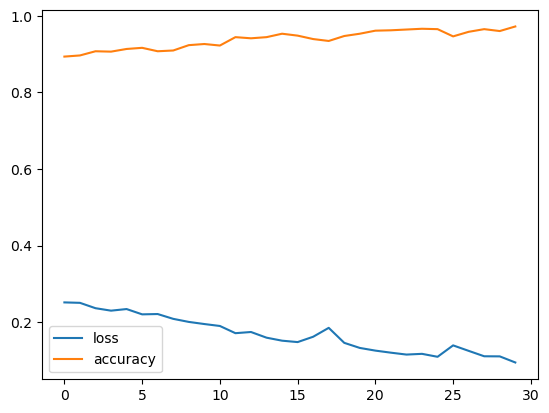

In [50]:
# Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
model_history.plot()

In [51]:
# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [56]:
model_clf.evaluate(x_test_sc,y_test)

12/12 [==============================] - 0s 2ms/step - loss: 1.1436 - accuracy: 0.7119


[1.1435692310333252, 0.7118644118309021]

In [54]:
y_pred=model_clf.predict(x_test_sc)

12/12 [==============================] - 0s 1ms/step
